# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy.constants import convert_temperature

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import utils functions
from utils import fetch_api_data

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


In [8]:
# url = f"https://api.openweathermap.org/data/3.0/onecall?lat=33.44&lon=-94.04&appid={weather_api_key}"
params = {"q": "London",
          "appid": weather_api_key}

url = f"http://api.openweathermap.org/data/2.5/weather"
data = fetch_api_data(url, params)
print(json.dumps(data, indent=2))

{
  "coord": {
    "lon": -0.1257,
    "lat": 51.5085
  },
  "weather": [
    {
      "id": 804,
      "main": "Clouds",
      "description": "overcast clouds",
      "icon": "04n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 292.76,
    "feels_like": 292.87,
    "temp_min": 290.85,
    "temp_max": 294.01,
    "pressure": 1012,
    "humidity": 80,
    "sea_level": 1012,
    "grnd_level": 1008
  },
  "visibility": 10000,
  "wind": {
    "speed": 0.45,
    "deg": 261,
    "gust": 2.24
  },
  "clouds": {
    "all": 96
  },
  "dt": 1722640517,
  "sys": {
    "type": 2,
    "id": 2091269,
    "country": "GB",
    "sunrise": 1722659264,
    "sunset": 1722714331
  },
  "timezone": 3600,
  "id": 2643743,
  "name": "London",
  "cod": 200
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {"q": city,
              "appid": weather_api_key}
   # city_url = # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = fetch_api_data(url, params)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | tofol
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | sterling
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | dryden
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | polyarnyy
Processing Record 12 of Set 1 | mugia
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | regina
Processing Record 15 of Set 1 | weno
Processing Record 16 of Set 1 | xiongzhou
Processing Record 17 of Set 1 | ushtobe
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | jabat
Processing Record 20 of Set 1 | arroio grande
Processing Record 21 of Set 1 | akrehamn
Processing Record 22 of Set 1 | waynesboro
Processing Record 23 of Set 1 | 

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,293.33,77,27,2.82,PN,1722641313
1,tofol,5.3248,163.0078,303.03,74,75,1.54,FM,1722641314
2,college,64.8569,-147.8028,284.33,88,100,5.66,US,1722641316
3,sterling,39.0062,-77.4286,307.34,55,75,3.09,US,1722641317
4,grytviken,-54.2811,-36.5092,274.34,89,100,5.99,GS,1722641318


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.33,77,27,2.82,PN,1722641313
1,tofol,5.3248,163.0078,303.03,74,75,1.54,FM,1722641314
2,college,64.8569,-147.8028,284.33,88,100,5.66,US,1722641316
3,sterling,39.0062,-77.4286,307.34,55,75,3.09,US,1722641317
4,grytviken,-54.2811,-36.5092,274.34,89,100,5.99,GS,1722641318


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

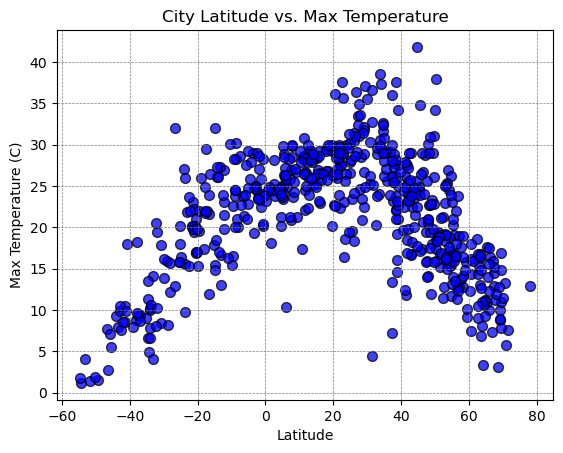

In [33]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = convert_temperature(city_data_df["Max Temp"], 'Kelvin', 'Celsius')
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

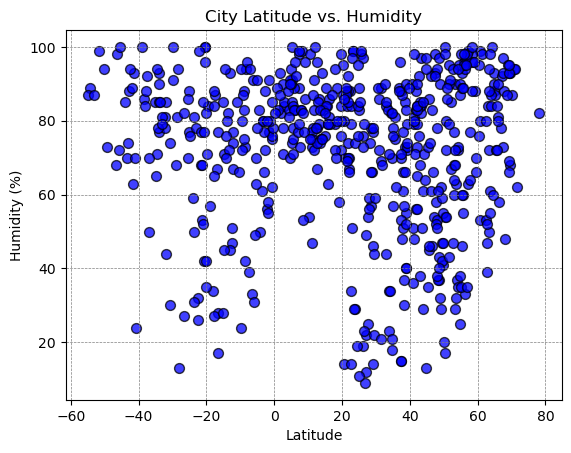

In [34]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

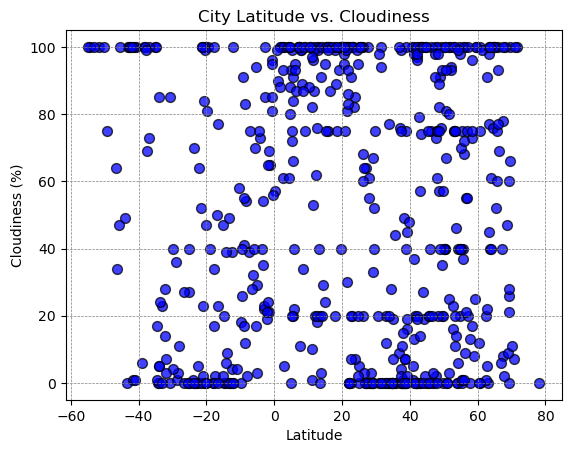

In [35]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

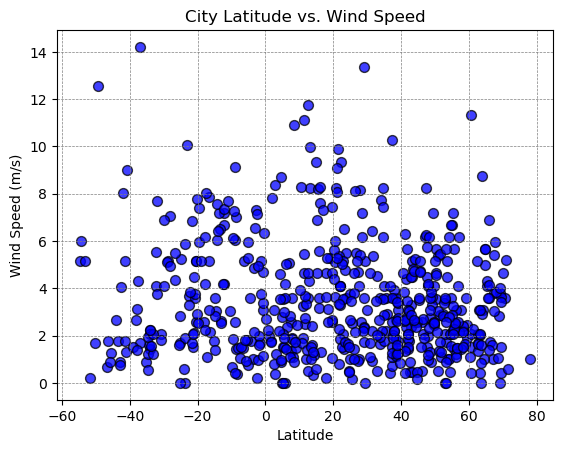

In [36]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def create_lin_reg_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tofol,5.3248,163.0078,303.03,74,75,1.54,FM,1722641314
2,college,64.8569,-147.8028,284.33,88,100,5.66,US,1722641316
3,sterling,39.0062,-77.4286,307.34,55,75,3.09,US,1722641317
6,dryden,49.7833,-92.7503,299.31,41,0,4.12,CA,1722641321
7,bethel,41.3712,-73.4140,300.79,81,100,4.40,US,1722641322


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.33,77,27,2.82,PN,1722641313
4,grytviken,-54.2811,-36.5092,274.34,89,100,5.99,GS,1722641318
5,puerto natales,-51.7236,-72.4875,274.63,99,100,0.20,CL,1722641319
8,waitangi,-43.9535,-176.5597,282.49,85,49,2.68,NZ,1722641323
12,margaret river,-33.9500,115.0667,283.19,77,85,2.23,AU,1722641328


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3757066254389902


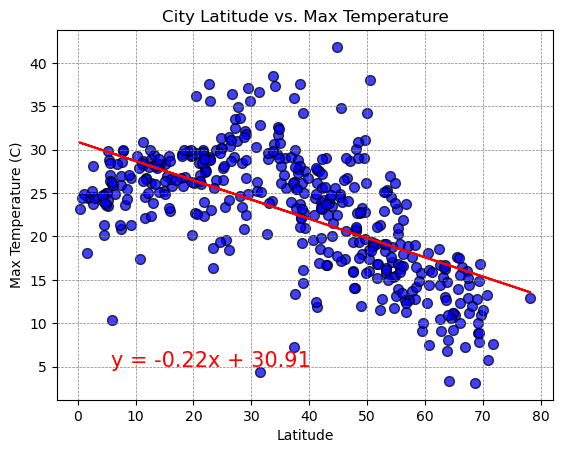

In [49]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = convert_temperature(northern_hemi_df["Max Temp"], 'Kelvin', 'Celsius')
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.8,5),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.6805244032612745


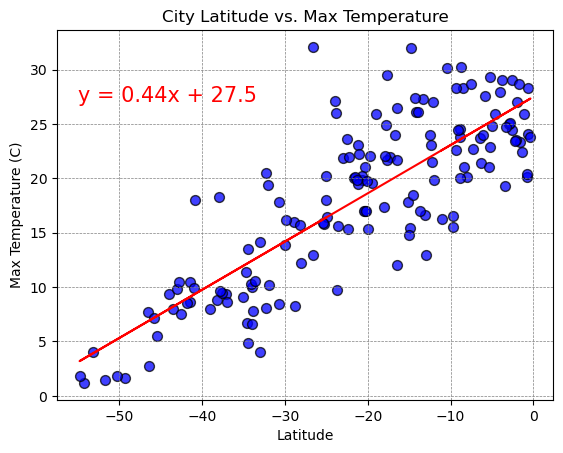

In [53]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = convert_temperature(southern_hemi_df["Max Temp"], 'Kelvin', 'Celsius')
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55, 27),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere as the latitude increases the temperature decreases. Whereas in the southern hemispere as the latitude increases the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0062143597882816


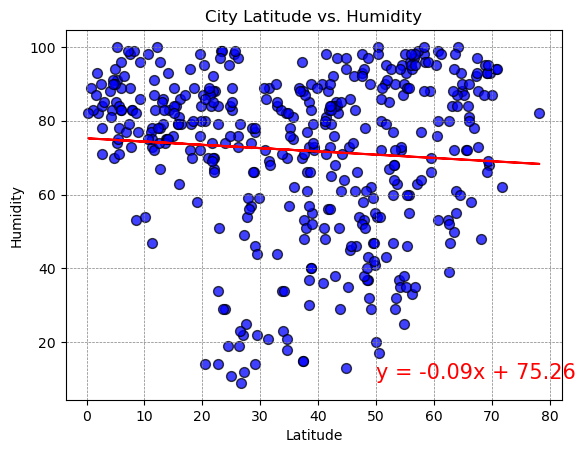

In [55]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.035768958824080606


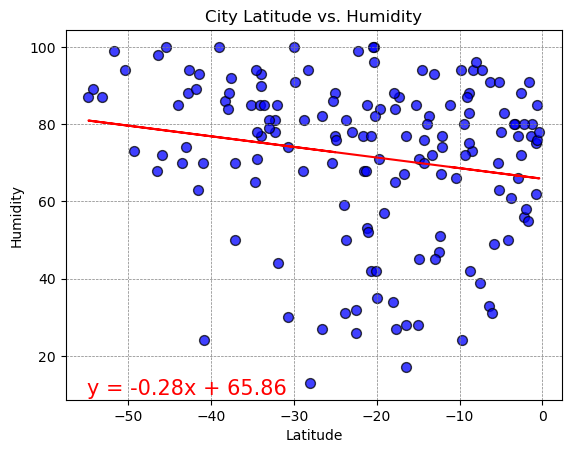

In [59]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03220943164963314


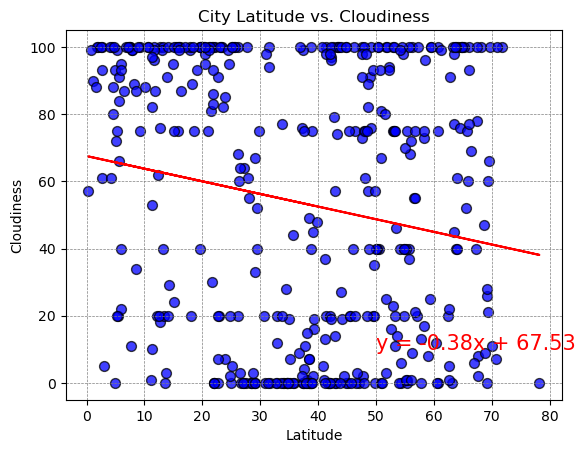

In [60]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.025781933952351527


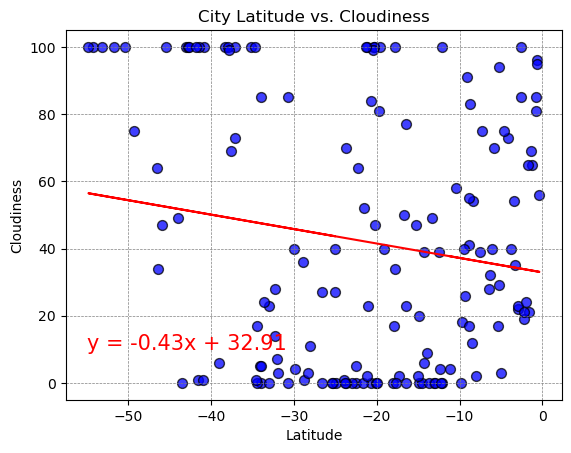

In [63]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01098008062264019


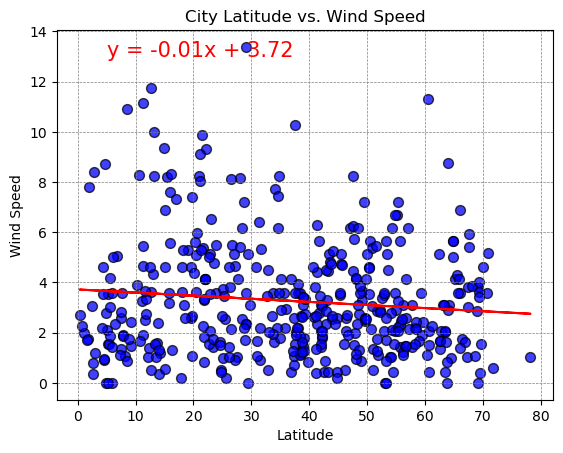

In [64]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,13),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.0014704468180041614


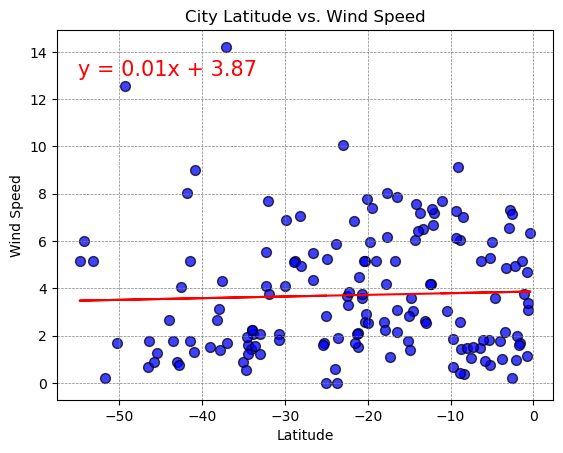

In [65]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)
# Incorporate the other graph properties
(regress_values, line_eq, rvalue) = create_lin_reg_plot(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,13),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE